# Results on Iris task using uniform propability distributions to sample weights

In [1]:
from rewann.tools import load_experiment_series, mean_comparison
import os
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import logging

In [2]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

In [3]:
df = load_experiment_series("../data/iris_uniform",
    sort_by=['distribution/lower_bound', 'distribution/upper_bound']
)
df['lower_bound'] = df['distribution/lower_bound']
df['upper_bound'] = df['distribution/upper_bound']

## Best Mean Accuracies (per individual, mean over sampled weights)
### best mean per interval

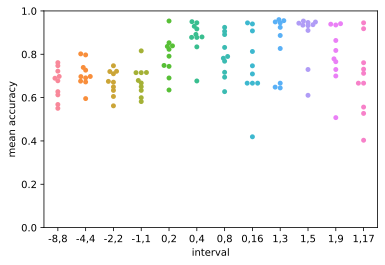

In [4]:
df['interval'] = df.agg('{0[lower_bound]},{0[upper_bound]}'.format, axis=1)
sns.swarmplot(x="interval", y="mean accuracy", data=df)
plt.ylim([0,1])
plt.show()

### best mean per lower bound type (sign of lower bound)

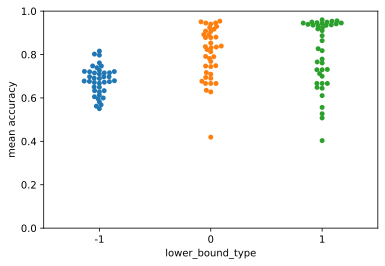

In [5]:
df['lower_bound_type'] = np.sign(df['lower_bound'])
sns.swarmplot(x="lower_bound_type", y="mean accuracy", data=df)
plt.ylim([0,1])
plt.show()

In [6]:
mean_comparison(df, 'lower_bound_type', (-1,0,1))

lower_bound_type=0 is significantly (0.0%) better than lower_bound_type=-1
5.753790771181524 3.0394606451808954e-07
lower_bound_type=1 is significantly (0.0%) better than lower_bound_type=-1
4.654818409153505 2.233967936914187e-05


### best mean per interval size

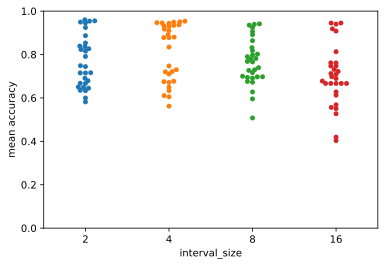

In [7]:
df['interval_size'] = df['upper_bound'] - df['lower_bound']
sns.swarmplot(x="interval_size", y="mean accuracy", data=df)
plt.ylim([0,1])
plt.show()

In [8]:
mean_comparison(df, 'interval_size', (2,4,8,16))    

interval_size=2 is significantly (4.5%) better than interval_size=16
2.0455527284922117 0.045450060064243916
interval_size=4 is significantly (0.3%) better than interval_size=16
3.120494071316068 0.002816370192655524
interval_size=8 is significantly (4.5%) better than interval_size=16
2.050294649732454 0.045185963039700995
